# Let us try PCA
Idea #1:
- collect tumor spectra and normal spectra from all Grade IV patients
- represent the spectra in a high dimensional space (number of dimensions = number of bands)
- run the PCA and get the weights for the first component
- check how much match between the first component and the absorption spectra

In [ ]:
#### Creating a dataset for PCA analysis
# # DANGER: takes long time on a normal PC
# # collect tumor, normal, blood spectra from the whole HELICoiD dataset

# ## Labels:
# # 0 = indicates pixels that are not labelled,
# # 1 = Normal Tissue, 
# # 2 = Tumour Tissue, 
# # 3 = Hypervascularized Tissue, 
# # 4 = Background

# gradeIVpatients = ["008-01"] #, "008-02"] #, "010-03", "012-01", "012-02", "014-01", "015-01", 
#                   #"016-04", "016-05", "017-01", "020-01", "025-02"]


# path = "/home/ivan/aimlab/HELICoiD/HSI_Human_Brain_Database_IEEE_Access/"

# tumor = []
# normal = []
# blood = []

# wavelength = np.linspace(450, 900, 826)

# for patient in gradeIVpatients:
    
    
#     gt_path = path + "{}/gtMap.hdr".format(patient)
#     gt = open_image(gt_path)
#     gt = gt.load()
    
#     hdr_path = path + "{}/raw.hdr".format(patient)
#     img = open_image(hdr_path) 
    
    
# #     x_tumor, y_tumor = (gt.squeeze(-1)==2).nonzero() # selects pixels which labels belong to tumor class
    
# #     for ix in range(len(x_tumor)): # loop over all tumor pixels
        
# #         intensity = []
            
# #         for ib in range(img.shape[-1]): # loop over the 3rd band dimension
# #             intensity.append(img[x_tumor[ix],y_tumor[ix],ib][0][0][0])
        
# #         tumor.append(intensity)
    
# #     x_normal, y_normal = (gt.squeeze(-1)==1).nonzero() # selects pixels which labels belong to normal class
    
# #     for ix in range(len(x_normal)): # loop over all tumor pixels

# #         intensity = []

# #         for ib in range(img.shape[-1]): # loop over the 3rd band dimension
# #             intensity.append(img[x_normal[ix],y_normal[ix],ib][0][0][0])

# #         normal.append(intensity)
        
#     x_blood, y_blood = (gt.squeeze(-1)==3).nonzero() # selects pixels which labels belong to blood class
        
#     for ix in range(len(x_blood)): # loop over all tumor pixels

#         intensity = []

#         for ib in range(img.shape[-1]): # loop over the 3rd band dimension
#             intensity.append(img[x_blood[ix],y_blood[ix],ib][0][0][0])

#         blood.append(intensity)

# np.savez_compressed("pca_tumor_normal", tumor=tumor, normal=normal, blood=blood)


(12275, 826) (35396, 826) (27558, 826)


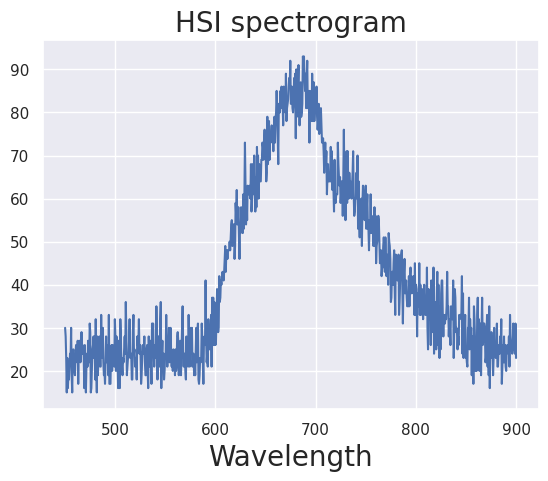

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# load lists for tumor, normal, and blood spectras. In total we have: 
# tumor 1221+138+855+3139+30+2046+3655+1282 spectras, 
# normal 2295+2187+10626+4516+6553+1251+1178+2643+1328+1842+977 spectras,
# blood 1331+1000+2332+8697+6041+64+4089+1064+452+68+1513+907 spectras,

tumor = np.load('pca_tumor_normal.npz')['tumor']
normal = np.load('pca_tumor_normal.npz')['normal']
blood = np.load('pca_tumor_normal.npz')['blood']
print(tumor.shape, normal.shape, blood.shape)

wavelength = np.linspace(450, 900, 826)

for i in range(len(tumor)):
    
    plt.plot(wavelength, tumor[i])
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("HSI spectrogram", fontsize=20)
    plt.show()
    
    if i==0:
        break

# Tumor tissue

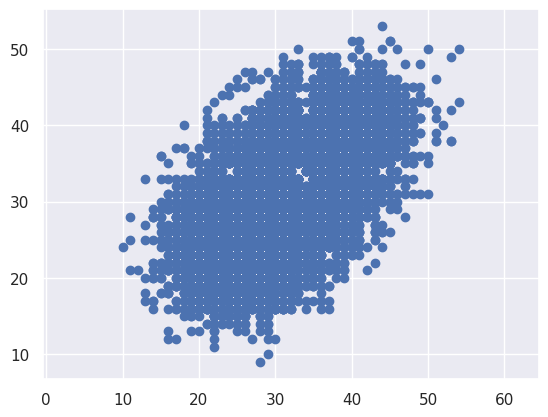

In [2]:
tumor = np.asarray(tumor)
T = tumor[:10000,:]
plt.scatter(T[:, 0], T[:, 1])
plt.axis('equal');



In [3]:
from sklearn.decomposition import PCA
pca_t = PCA(n_components=5)
pca_t.fit(T)



PCA(n_components=5)

Text(0.5, 1.0, 'tumor')

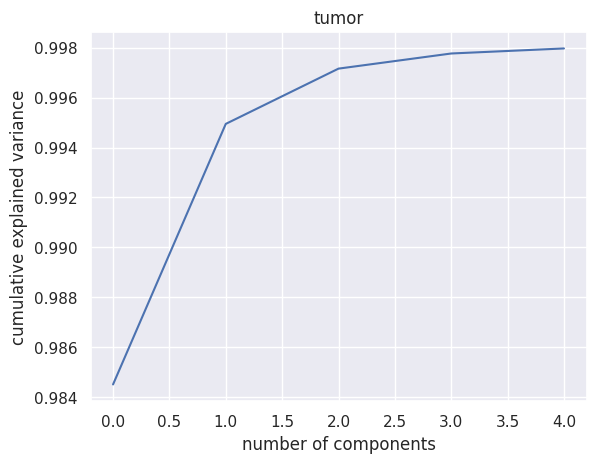

In [4]:
plt.plot(np.cumsum(pca_t.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('tumor')

In [5]:
# ix = 0

# plt.plot(wavelength, pca_t.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))
# plt.ylabel('weight');
# plt.title('tumor')

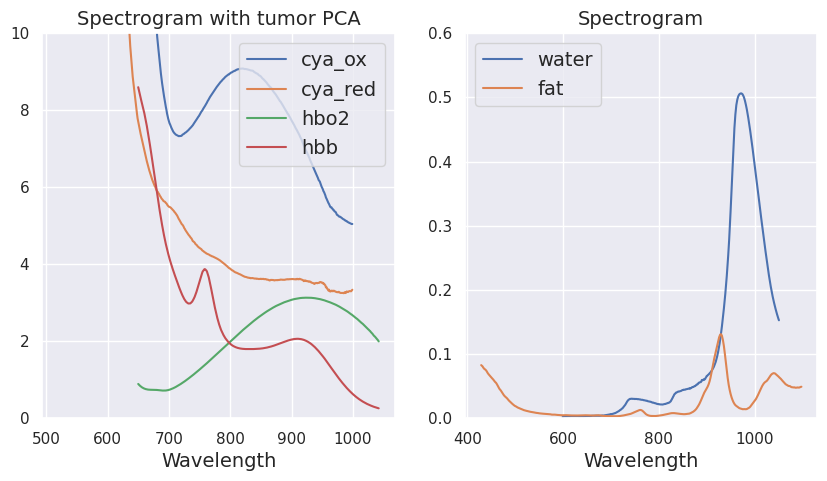

In [7]:
path_absorp = "/home/ivan/aimlab/UCL-NIR-Spectra/spectra/"
hbo2_absorp = path_absorp + "hb02.txt"
hhb_absorp = path_absorp + "hb.txt"
water_absorp = path_absorp + "matcher94_nir_water_37.txt"
diff_cyto_absorp = path_absorp + "cytoxidase_diff_odmMcm.txt"
fat_absorp = path_absorp + "fat.txt"
cytoa_oxy_absorp = path_absorp + "moody cyt aa3 oxidised.txt"
cytoa_red_absorp = path_absorp + "moody cyt aa3 reduced.txt"
cytob_oxy_absorp = path_absorp + "cope cyt b oxidised.txt"
cytob_red_absorp = path_absorp + "cope cyt b reduced.txt"
cytoc_oxy_absorp = path_absorp + "cooper pig c oxidised.txt"
cytoc_red_absorp = path_absorp + "cooper pig c reduced.txt"
cytoc_red_absorp = path_absorp + "cooper pig c reduced.txt"
hb450_absorp = path_absorp + "z_adult_hb_450_630.txt"
hb600_absorp = path_absorp + "z_adult_hb_600_800.txt"
hbo2_450_absorp = path_absorp + "z_adult_hbo2_450_630.txt"
hbo2_600_absorp = path_absorp + "z_adult_hbo2_600_800.txt"


### reading cpectra from .txt
def read_spectra(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

x_coxa, y_coxa = read_spectra(cytoa_oxy_absorp) # cytochrome oxydised
x_creda, y_creda = read_spectra(cytoa_red_absorp) # cytochrome reduced
x_coxb, y_coxb = read_spectra(cytob_oxy_absorp) # cytochrome oxydised
x_credb, y_credb = read_spectra(cytob_red_absorp) # cytochrome reduced
x_coxc, y_coxc = read_spectra(cytoc_oxy_absorp) # cytochrome oxydised
x_credc, y_credc = read_spectra(cytoc_red_absorp) # cytochrome reduced

x_hbo2, y_hbo2 = read_spectra(hbo2_absorp) # oxyhemoglobin
x_hbb, y_hbb = read_spectra(hhb_absorp) # hemoglobin
x_hb450, y_hb450 = read_spectra(hb450_absorp) # hemoglobin
x_hb600, y_hb600 = read_spectra(hb600_absorp) # hemoglobin
x_hbo2_450, y_hbo2_450 = read_spectra(hbo2_450_absorp) # hemoglobin
x_hbo2_600, y_hbo2_600 = read_spectra(hbo2_600_absorp) # hemoglobin
x_water, y_water = read_spectra(water_absorp) # water
x_fat, y_fat = read_spectra(fat_absorp)

y_hb450 = [i * 2.3025851 for i in y_hb450] # from extinction to absorption  
y_hb600 = [i * 2.3025851 for i in y_hb600] # from extinction to absorption  
y_hbo2_450 = [i * 2.3025851 for i in y_hbo2_450] # from extinction to absorption  
y_hbo2_600 = [i * 2.3025851 for i in y_hbo2_600] # from extinction to absorption  

y_coxa = [i * 2.3025851 for i in y_coxa] # from extinction to absorption  
y_creda = [i * 2.3025851 for i in y_creda] # from extinction to absorption
y_coxb = [i * 2.3025851 for i in y_coxb] # from extinction to absorption  
y_credb = [i * 2.3025851 for i in y_credb] # from extinction to absorption 
y_coxc = [i * 2.3025851 for i in y_coxc] # from extinction to absorption  
y_credc = [i * 2.3025851 for i in y_credc] # from extinction to absorption 
y_water = [i * 2.3025851 for i in y_water] # from extinction to absorption  
y_hbo2 = [i * 10 * 1000 for i in y_hbo2] # from mm and micromole to cm and minimole 
y_hbb = [i * 10 * 1000 for i in y_hbb] # from mm and micromole to cm and minimole
y_fat = [i / 100 for i in y_fat] # from m to cm 

### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_coxa, y_coxa, label='cya_ox')
ax.plot(x_creda, y_creda, label='cya_red')
#ax.plot(x_coxb, y_coxb, label='cyb_ox')
#ax.plot(x_credb, y_credb, label='cyb_red')
#ax.plot(x_hb450, y_hb450, label='hbb450')
#ax.plot(x_hb600, y_hb600, label='hbb600')
#ax.plot(x_hbo2_450, y_hbo2_450, label='hbo2_450')
#ax.plot(x_hbo2_600, y_hbo2_600, label='hbo2_600')
#ax.plot(x_coxc, y_coxc, label='cyc_ox')
#ax.plot(x_credc, y_credc, label='cyc_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
#ax.plot(x_water, y_water, label='water')
#ax.plot(x_fat, y_fat, label='fat')
#ax.plot(wavelength, pca_t.components_[ix]*1500, 'c--', label='PCA #{}'.format(ix+1))
ax.set_title("Spectrogram with tumor PCA", fontsize=14)
ax.set_xlabel("Wavelength", fontsize=14)

#ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 10)
ax.legend(fontsize=14)

    
ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=14)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
#ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)

# Normal tissue

In [103]:
# for i in range(len(normal)):
    
#     plt.plot(wavelength, normal[i])
#     plt.xlabel("Wavelength", fontsize=20)
#     plt.title("HSI  spectrogram", fontsize=20)
#     plt.show()
    
#     if i==0:
#         break

In [104]:
normal = np.asarray(normal)
N = normal[:10000,:]

pca_n = PCA(n_components=5)
pca_n.fit(N)

# plt.plot(np.cumsum(pca_n.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
# plt.title('normal')

PCA(n_components=5)

In [105]:
ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, -pca_n.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))
# plt.ylabel('weight');
# plt.title('normal')

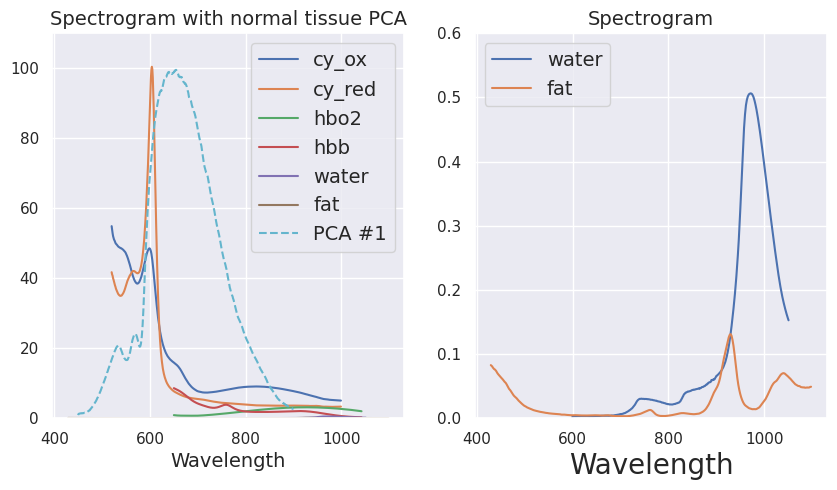

In [106]:
### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_coxa, y_coxa, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=14)
ax.plot(x_creda, y_creda, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.plot(wavelength, -pca_n.components_[ix]*1500, 'c--', label='PCA #{}'.format(ix+1))
ax.set_title("Spectrogram with normal tissue PCA", fontsize=14)
#ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 110)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
#ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)

# Blood

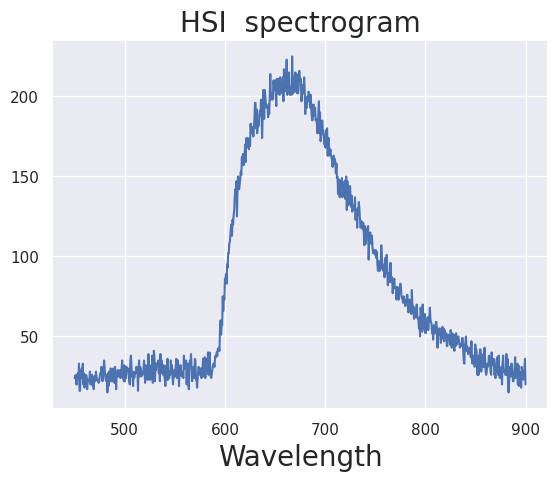

In [107]:
for i in range(len(blood)):
    
    plt.plot(wavelength, blood[i])
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("HSI  spectrogram", fontsize=20)
    plt.show()
    
    if i==0:
        break

In [108]:
blood = np.asarray(blood)
B = blood[:10000,:]

pca_b = PCA(n_components=5)
pca_b.fit(B)

# plt.plot(np.cumsum(pca_b.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
# plt.title('blood')

PCA(n_components=5)

In [109]:
# ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, pca_b.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))
# plt.ylabel('weight');
# plt.title('blood')

In [110]:
# ### Visualising spectrograms of chromophores
# fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

# ax.plot(x_cox, y_cox, label='cy_ox')
# ax.set_xlabel("Wavelength", fontsize=14)
# ax.plot(x_cred, y_cred, label='cy_red')
# ax.plot(x_hbo2, y_hbo2, label='hbo2')
# ax.plot(x_hbb, y_hbb, label='hbb')
# ax.plot(x_water, y_water, label='water')
# ax.plot(x_fat, y_fat, label='fat')
# ax.plot(wavelength, pca_b.components_[ix]*1500, 'c--', label='PCA #{}'.format(ix+1))
# ax.set_title("Spectrogram with blood PCA", fontsize=14)
# #ax.set_xlim(left_cut, right_cut)
# ax.set_ylim(0, 110)
# ax.legend(fontsize=14)


# ax1.plot(x_water, y_water, label='water')
# ax1.set_xlabel("Wavelength", fontsize=20)
# ax1.plot(x_fat, y_fat, label='fat')
# #ax.set_xlabel("Wavelength", fontsize=20)
# ax1.set_title("Spectrogram", fontsize=14)
# #ax1.set_xlim(left_cut, right_cut)
# ax1.set_ylim(0, 0.6)
# ax1.legend(fontsize=14)

# All 3: tumor, normal, blood

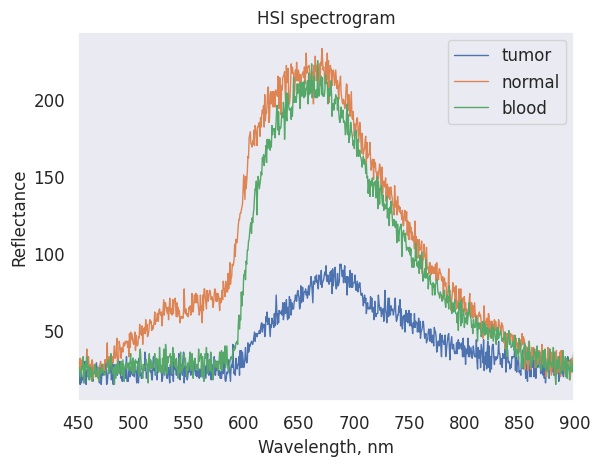

In [111]:
size=12

from cycler import cycler
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

for i in range(len(blood)):
    fig, ax1 = plt.subplots()
    #ax2 = ax1.twinx()
    lsize = 5
    #ax2.set_prop_cycle(cycler('color', plt.cm.get_cmap('tab10_r').colors)) #matplotlib.cm.get_cmap('autumn_r')
    ax1.plot(wavelength, tumor[i], label="tumor", linewidth=1)
    ax1.plot(wavelength, normal[i], label="normal", linewidth=1)
    ax1.plot(wavelength, blood[i], label="blood", linewidth=1)
    
    #ax2.plot(x_cred, y_cred, label='redCCO aa3', linewidth=lsize)
    #ax2.plot(x_cox[130:], y_cox[130:], label='Ox_Cyto_aa3', linewidth=lsize)
    #plt.plot(x_hbb, np.asarray(y_hbb), label='HHb', linewidth=lsize)
    #plt.plot(x_hbo2, np.asarray(y_hbo2), label='HbO2', linewidth=lsize)
    #ax2.plot(x_hbo2_450 + x_hbo2_600 + x_hbo2[150:], np.asarray(y_hbo2_450+y_hbo2_600+y_hbo2[150:]), label='hbo2_450', linewidth=size)
    #ax2.plot(x_hb450 + x_hb600[30:] + x_hbb[150:], np.asarray(y_hb450+y_hb600[30:]+ y_hbb[150:]), label='hb_450', linewidth=size)
    #plt.plot(x_water, 30*np.asarray(y_water), label='water', linewidth=3.0)
    #plt.plot(x_fat, 30*np.asarray(y_fat), label='fat', linewidth=3.0)
    #ax2.set_ylabel('Absorption coefficient');

    ax1.set_ylabel('Reflectance');
    
    ax1.set_xlabel("Wavelength, nm")
    ax1.grid(False)
    #ax2.set_ylim(0,11)
    #ax2.set_xlim(700,900)


    plt.title("HSI spectrogram")
    plt.xlim(450,900)
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig("ThreeSpectra.pdf", dpi=200, bbox_inches="tight")

    if i==0:
        break

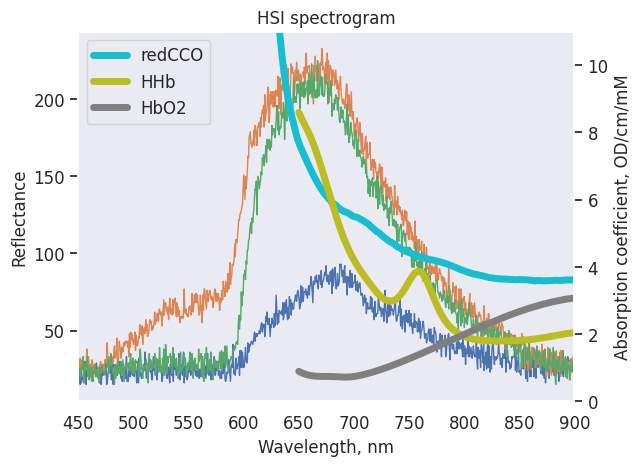

In [112]:
from cycler import cycler
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

for i in range(len(blood)):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    lsize = 5
    ax2.set_prop_cycle(cycler('color', plt.cm.get_cmap('tab10_r').colors)) #matplotlib.cm.get_cmap('autumn_r')
    ax1.plot(wavelength, tumor[i], label="tumor", linewidth=1)
    ax1.plot(wavelength, normal[i], label="normal", linewidth=1)
    ax1.plot(wavelength, blood[i], label="blood", linewidth=1)
    
    ax2.plot(x_creda, y_creda, label='redCCO', linewidth=lsize)
    #ax2.plot(x_cox[130:], y_cox[130:], label='Ox_Cyto_aa3', linewidth=lsize)
    plt.plot(x_hbb, np.asarray(y_hbb), label='HHb', linewidth=lsize)
    plt.plot(x_hbo2, np.asarray(y_hbo2), label='HbO2', linewidth=lsize)
    #ax2.plot(x_hbo2_450 + x_hbo2_600 + x_hbo2[150:], np.asarray(y_hbo2_450+y_hbo2_600+y_hbo2[150:]), label='hbo2_450', linewidth=size)
    #ax2.plot(x_hb450 + x_hb600[30:] + x_hbb[150:], np.asarray(y_hb450+y_hb600[30:]+ y_hbb[150:]), label='hb_450', linewidth=size)
    #plt.plot(x_water, 30*np.asarray(y_water), label='water', linewidth=3.0)
    #plt.plot(x_fat, 30*np.asarray(y_fat), label='fat', linewidth=3.0)
    ax2.set_ylabel('Absorption coefficient, OD/cm/mM');

    ax1.set_ylabel('Reflectance');
    
    ax1.set_xlabel("Wavelength, nm")
    ax1.grid(False)
    ax2.grid(False)
    ax2.set_ylim(0,11)
    #ax2.set_xlim(700,900)


    plt.title("HSI spectrogram")
    plt.xlim(450,900)
    plt.legend(loc='upper left')
    #plt.show()
    plt.savefig("ThreeSpectra_Hemo.pdf", dpi=200, bbox_inches="tight")

    if i==0:
        break

# PCA: Normal vs Tumor vs Blood

Text(0.5, 1.0, 'normal vs tumor')

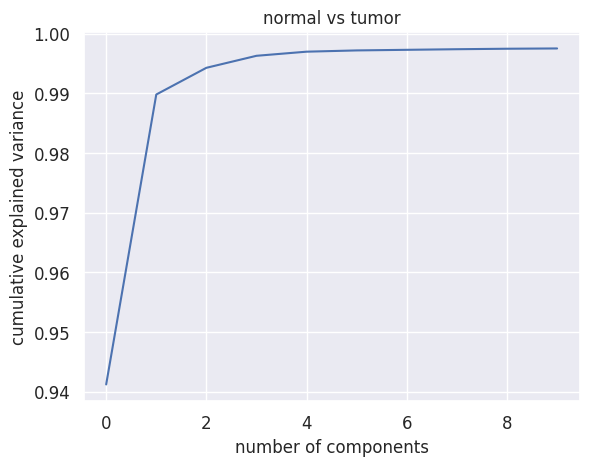

In [113]:
N_and_T_and_B = np.concatenate((normal[:10000,:], tumor[:10000,:], blood[:10000,:]), axis=0)

pca_ntb = PCA(n_components=10)
pca_ntb.fit(N_and_T_and_B)

plt.plot(np.cumsum(pca_ntb.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs tumor')

In [114]:
# ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, pca_ntb.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))

# plt.ylabel('weight');
# plt.title('normal vs tumor vs blood')

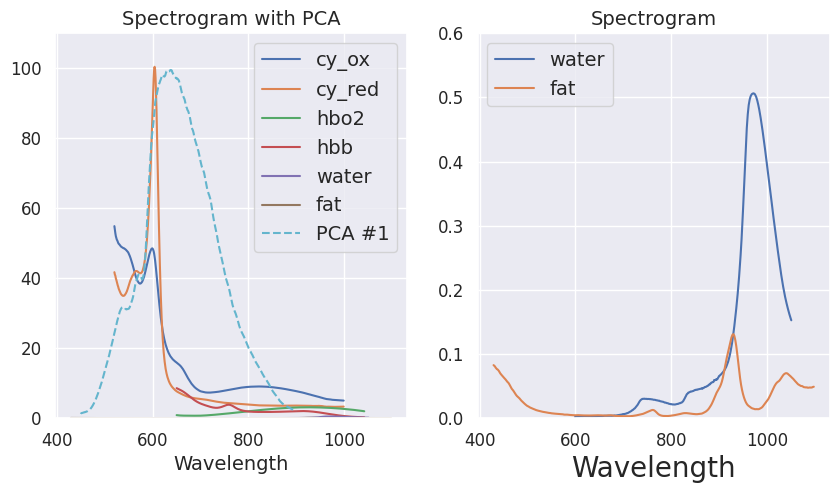

In [115]:
### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_coxa, y_coxa, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=14)
ax.plot(x_creda, y_creda, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.plot(wavelength, pca_ntb.components_[ix]*1500, 'c--', label='PCA #{}'.format(ix+1))
ax.set_title("Spectrogram with PCA", fontsize=14)
#ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 110)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
#ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)

(30000, 826)
(30000, 2)


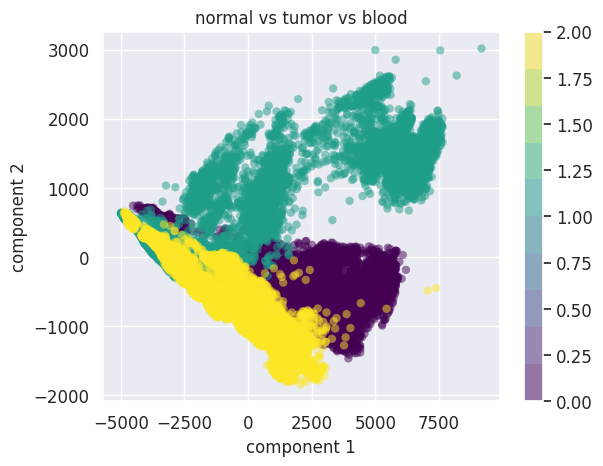

In [116]:
Y = [0 for x in range(10000)] + [1 for x in range(10000)] + [2 for x in range(10000)]
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_T_and_B)
print(N_and_T_and_B.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs tumor vs blood')
plt.colorbar();

Text(0.5, 1.0, 'tumor')

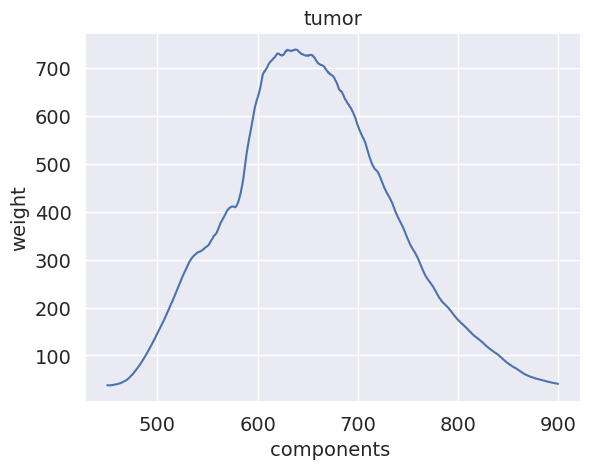

In [168]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(tumor[:10000,:])
kmeans.cluster_centers_.shape
# ix = 0

plt.plot(wavelength, kmeans.cluster_centers_[1,:])
plt.xlabel('components ')
plt.ylabel('weight');
plt.title('tumor')

# PCA: Normal vs Blood

Text(0.5, 1.0, 'normal vs blood')

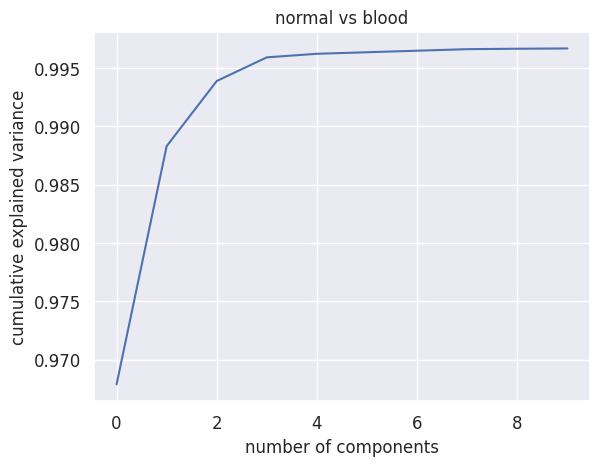

In [117]:
N_and_B = np.concatenate((normal[:10000,:], blood[:10000,:]), axis=0)

pca_nb = PCA(n_components=10)
pca_nb.fit(N_and_B)

plt.plot(np.cumsum(pca_nb.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs blood')

In [118]:
# ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, pca_nb.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))

# plt.ylabel('weight');
# plt.title('normal vs blood')

In [119]:
Y = [0 for x in range(10000)] + [1 for x in range(10000)]

In [120]:
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_B)
print(N_and_B.shape)
print(projected.shape)

(20000, 826)
(20000, 2)


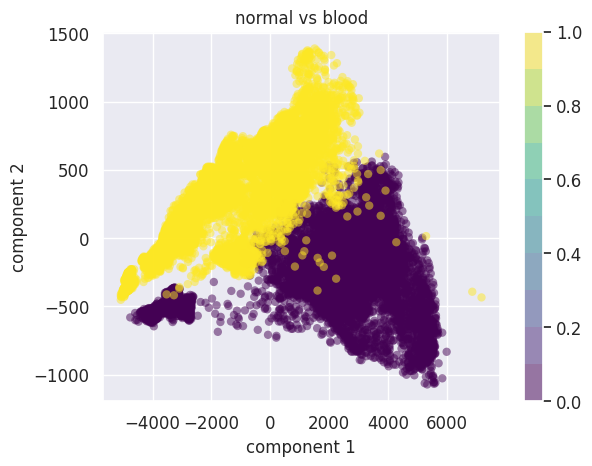

In [121]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs blood')
plt.colorbar();

# PCA Normal vs Tumor

Text(0.5, 1.0, 'normal vs tumor')

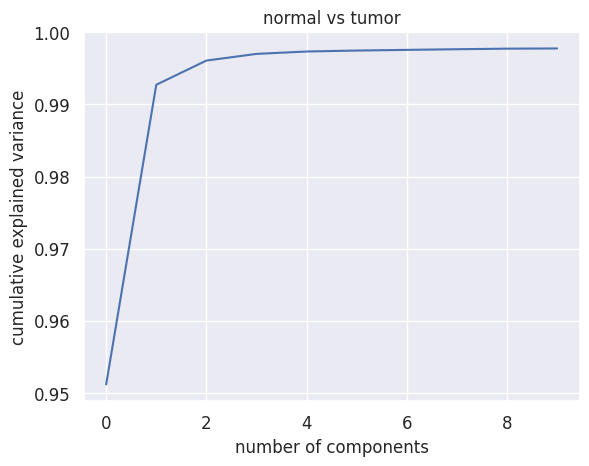

In [122]:
N_and_T = np.concatenate((normal[:10000,:], tumor[:10000,:]), axis=0)

pca_nt = PCA(n_components=10)
pca_nt.fit(N_and_T)

plt.plot(np.cumsum(pca_nt.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs tumor')

In [123]:
# ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, pca_nt.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))

# plt.ylabel('weight');
# plt.title('normal vs tumor')

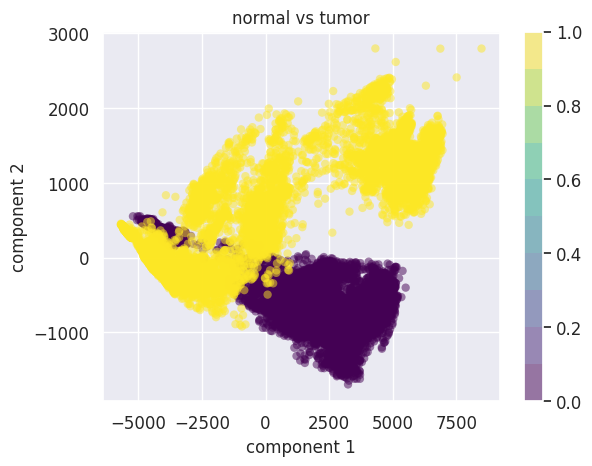

In [124]:
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_T)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs tumor')
plt.colorbar();

# PCA: Tumor vs Blood

Text(0.5, 1.0, 'normal vs tumor')

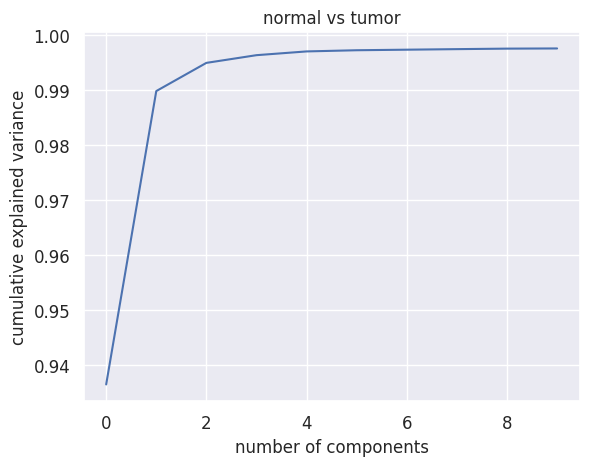

In [125]:
B_and_T = np.concatenate((blood[:10000,:], tumor[:10000,:]), axis=0)

pca_bt = PCA(n_components=10)
pca_bt.fit(B_and_T)

plt.plot(np.cumsum(pca_bt.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs tumor')

In [126]:
# ix = 0

# wavelength = np.linspace(450, 900, 826)
# plt.plot(wavelength, pca_bt.components_[ix])
# plt.xlabel('components #{}'.format(ix+1))

# plt.ylabel('weight');
# plt.title('normal vs tumor')

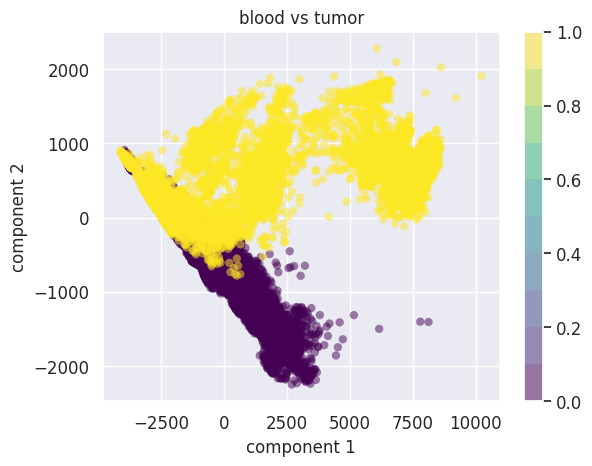

In [127]:
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(B_and_T)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('blood vs tumor')
plt.colorbar();

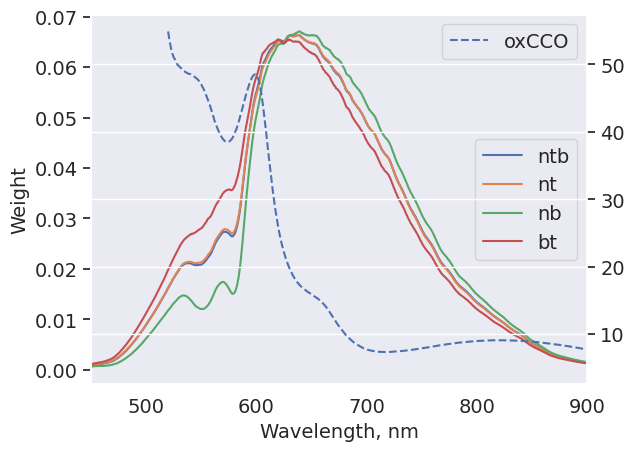

In [128]:
ix = 0
import matplotlib 
size=14
wavelength = np.linspace(450, 900, 826)
#matplotlib.rc('xtick', labelsize=size) 
#matplotlib.rc('ytick', labelsize=size) 
#matplotlib.rc('font', size=size)
#matplotlib.rc('axes', titlesize=size)

#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

#ax1.plot(x, y1, 'g-')
#ax2.plot(x, y2, 'b-')

#ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
#ax2.set_ylabel('Y2 data', color='b')


ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

#plt.plot(wavelength, -pca_n.components_[ix], label='n')
#plt.plot(wavelength, pca_t.components_[ix], label='t')
#plt.plot(wavelength, pca_b.components_[ix], label='b')
#plt.plot(wavelength, pca_nb.components_[ix], label='nb')
#plt.plot(x_cox, np.asarray(y_cox)/750, '.', label='cy_ox', markersize=1)
ax2.plot(x_coxa, np.asarray(y_coxa), '--', label='oxCCO', markersize=1)
#plt.plot(x_hbo2, np.asarray(y_hbo2)/100, '--', label='hbo2', markersize=1)
#plt.plot(x_hbb, np.asarray(y_hbb)/100, '--', label='hbb', markersize=1)

ax1.grid(False)

plt.xlim(450,900)
#ax1.titel('Principal component #{}'.format(ix+1))
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient');

ax1.set_ylabel('Weight');
#plt.title('normal vs tumor')
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_aa3_ox.pdf", dpi=200, bbox_inches="tight")
ax1.grid(False)


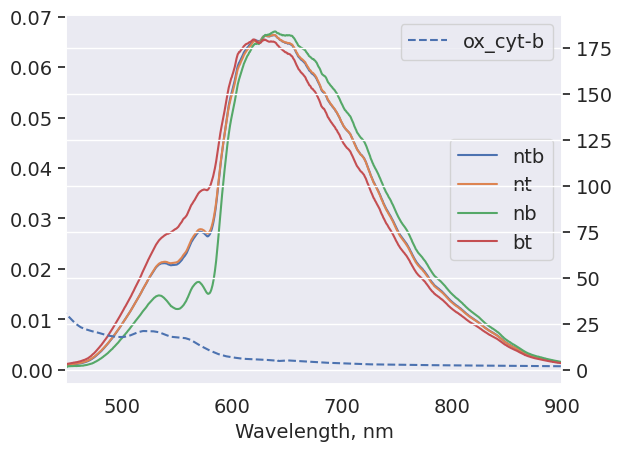

In [129]:
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_coxb, np.asarray(y_coxb), '--', label='ox_cyt-b', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_b_ox.pdf", dpi=200, bbox_inches="tight")
ax1.grid(False)


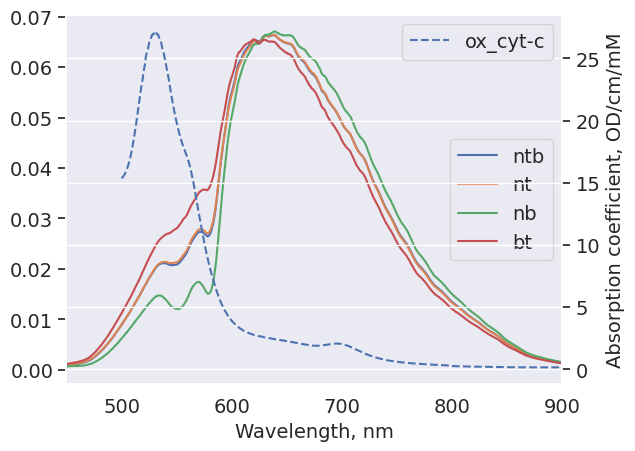

In [130]:
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_coxc, np.asarray(y_coxc), '--', label='ox_cyt-c', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_c_ox.pdf", dpi=200, bbox_inches="tight")
ax1.grid(False)


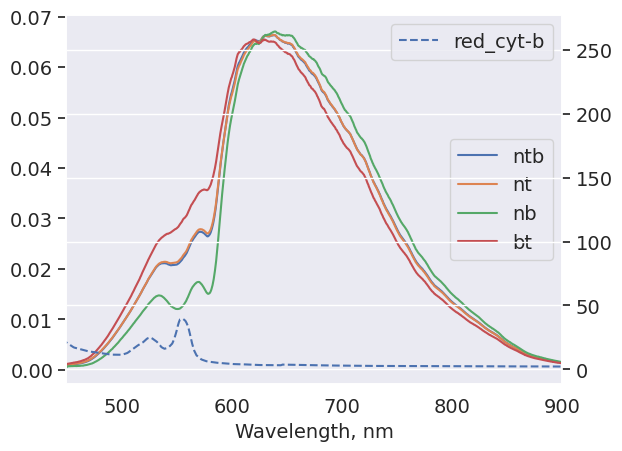

In [131]:
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_credb, np.asarray(y_credb), '--', label='red_cyt-b', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_b_red.pdf", dpi=200, bbox_inches="tight")



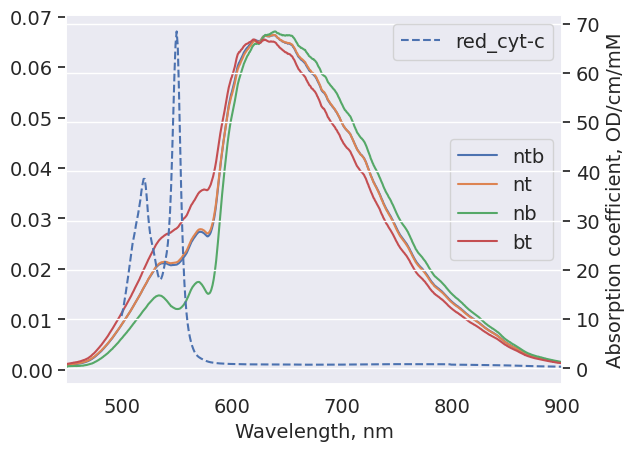

In [132]:
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_credc, np.asarray(y_credc), '--', label='red_cyt-c', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_c_red.pdf", dpi=200, bbox_inches="tight")


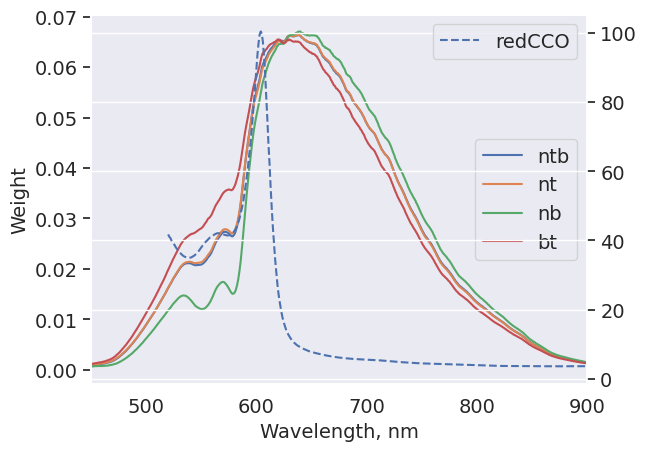

In [133]:
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_creda, np.asarray(y_creda), '--', label='redCCO', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient');
ax1.grid(False)
ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_cy_aa3_red.pdf", dpi=200, bbox_inches="tight")
# Turns off grid on the left Axis.

# Turns off grid on the secondary (right) Axis.
#ax1.right_ax.grid(False)


# Hemoglobin and PCA

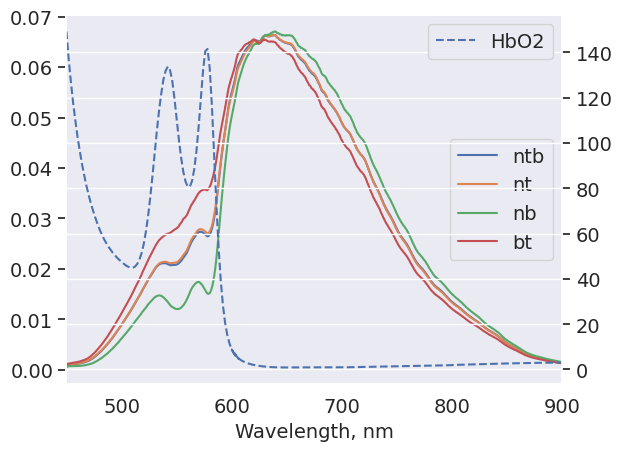

In [134]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_hbo2_450 + x_hbo2_600 + x_hbo2[150:], np.asarray(y_hbo2_450+y_hbo2_600+y_hbo2[150:]), '--', label='HbO2', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_oxyhaem.pdf", dpi=200, bbox_inches="tight")


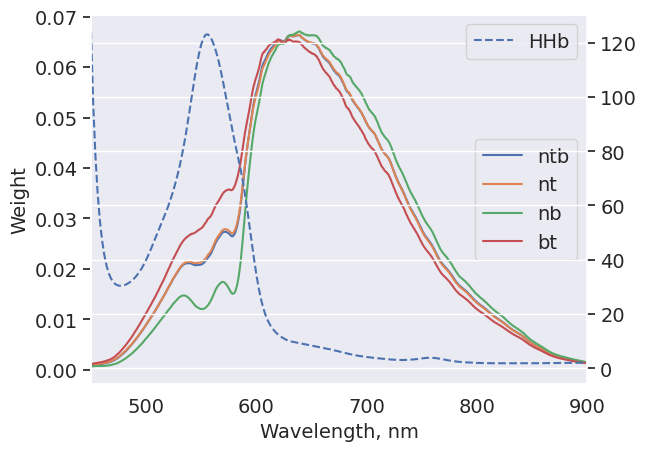

In [135]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_hb450 + x_hb600[30:] + x_hbb[150:], np.asarray(y_hb450+y_hb600[30:]+y_hbb[150:]), '--', label='HHb', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_haem.pdf", dpi=200, bbox_inches="tight")


# Water and PCA

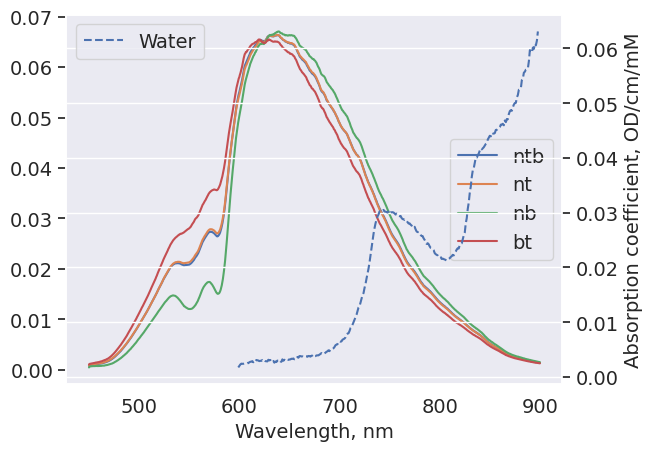

In [136]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_water[:300], np.asarray(y_water[:300]), '--', label='Water', markersize=1)

#plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
#ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
plt.savefig("PCA_water.pdf", dpi=200, bbox_inches="tight")


# Intra-class PCA

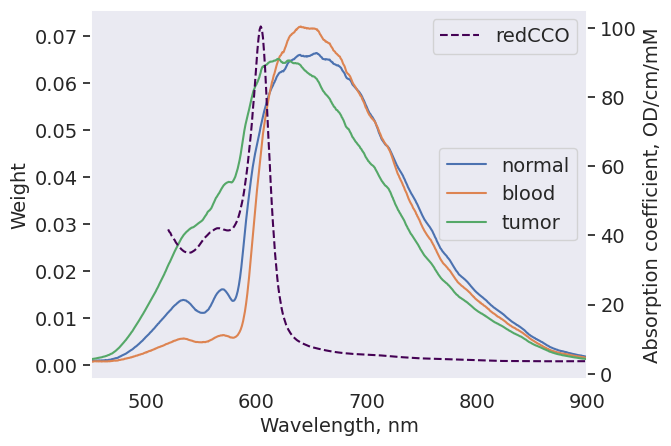

In [137]:
ix=0
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax2.set_prop_cycle(cycler('color', plt.cm.viridis.colors))

ax1.plot(wavelength, -pca_n.components_[ix], label='normal')
ax1.plot(wavelength, pca_b.components_[ix], label='blood')
ax1.plot(wavelength, pca_t.components_[ix], label='tumor')
#ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_creda, np.asarray(y_creda), '--', label='redCCO', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
ax2.grid(False)

ax1.set_ylabel('Weight');
ax1.legend()
ax2.legend()

ax1.legend(loc="center right")
plt.savefig("PCA_single.pdf", dpi=200, bbox_inches="tight")
# Turns off grid on the left Axis.

# Turns off grid on the secondary (right) Axis.
#ax1.right_ax.grid(False)


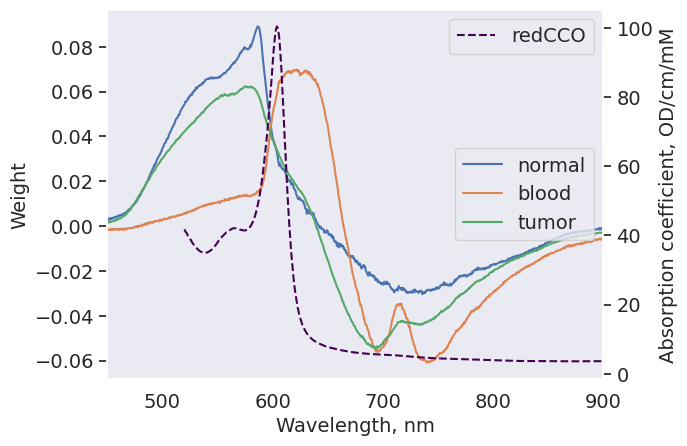

In [138]:
ix=1
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax2.set_prop_cycle(cycler('color', plt.cm.viridis.colors))

ax1.plot(wavelength, pca_n.components_[ix], label='normal')
ax1.plot(wavelength, -pca_b.components_[ix], label='blood')
ax1.plot(wavelength, -pca_t.components_[ix], label='tumor')
#ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

ax2.plot(x_creda, np.asarray(y_creda), '--', label='redCCO', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
ax2.set_ylabel('Absorption coefficient, OD/cm/mM');
ax1.grid(False)
ax2.grid(False)

ax1.set_ylabel('Weight');
ax1.legend()
ax2.legend()

ax1.legend(loc="center right")
#plt.savefig("PCA_single.pdf", dpi=200, bbox_inches="tight")
# Turns off grid on the left Axis.

# Turns off grid on the secondary (right) Axis.
#ax1.right_ax.grid(False)


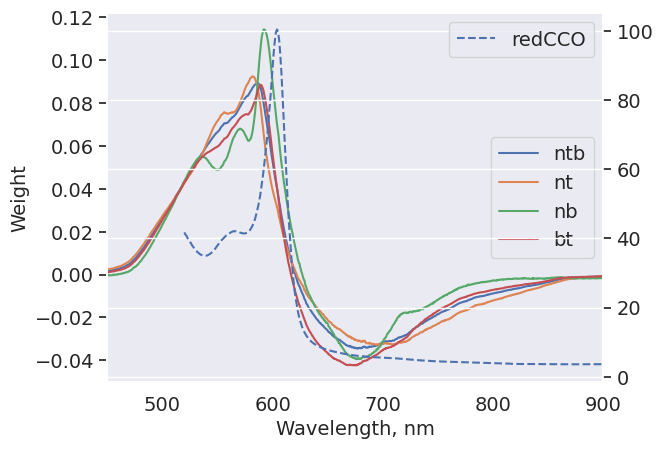

In [141]:
ix=1
fig, ax1 = plt.subplots()

plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('figure', titlesize=size)  # fontsize of the figure title

ax2 = ax1.twinx()
ax1.plot(wavelength, pca_ntb.components_[ix], label='ntb')
ax1.plot(wavelength, pca_nt.components_[ix], label='nt')
ax1.plot(wavelength, -pca_nb.components_[ix], label='nb')
ax1.plot(wavelength, pca_bt.components_[ix], label='bt')

#ax2.plot(x_hbo2_450 + x_hbo2_600 + x_hbo2[150:], np.asarray(y_hbo2_450+y_hbo2_600+y_hbo2[150:]), '--', label='HbO2', markersize=1)
#ax2.plot(x_hb450 + x_hb600[30:] + x_hbb[150:], np.asarray(y_hb450+y_hb600[30:]+y_hbb[150:]), '--', label='HHb', markersize=1)

ax2.plot(x_creda, np.asarray(y_creda), '--', label='redCCO', markersize=1)

plt.xlim(450,900)
ax1.set_xlabel('Wavelength, nm')
#ax2.set_ylabel('Absorption coefficient');
ax1.grid(False)
ax1.set_ylabel('Weight');
ax2.legend()
ax1.legend(loc="center right")
#plt.savefig("PCA_cy_aa3_red.pdf", dpi=200, bbox_inches="tight")
# Turns off grid on the left Axis.

# Turns off grid on the secondary (right) Axis.
#ax1.right_ax.grid(False)
